# Backtest a  Strategy

In [1]:
%matplotlib inline
import quantstats as qs
# extend pandas functionality with metrics, etc.
qs.extend_pandas()
from smartbots.crypto.historical_downloader import historical_downloader, save_test_data
import datetime as dt
import pandas as pd
from smartbots.engine.data_reader import read_data_to_dataframe
from smartbots.engine.portfolio_constructor import Portfolio_Constructor

C:\Users\jacar\OneDrive\Escritorio\SmartBots\venv\lib\site-packages\arctic\store\_pandas_ndarray_store.py:8: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


CCXT Version: 1.95.11


## 1) Download Historical Data from Data Provider and save into the database.
Please see here the docs of the exchanges available: https://github.com/ccxt/ccxt/wiki/Manual#markets


If you already have the data in a database, you can skip this step and go to the next.

Dependings of the symbols and the length of the data, the data loader will take some time to complete. Be pacience.

If there are already some data in the database, it will update only the new data.


In [4]:
# Parameters
interval = '1h'  # 1m , 5m, 30m, 1h
provider = 'kucoin'  # test , binance, coinbase ...
fresh_start = True # if you want to download the symbols again
if provider == 'test': # test data
    save_test_data()
else:
    symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
    start_date = dt.datetime(2018,1,1) # Start date of data to download
    end_date = dt.datetime.utcnow() # End date of data to download
    clean_symbols_database = []
    if fresh_start:
        clean_symbols_database = symbols
     # Interval of data to download,
    historical_downloader(symbols=symbols,start_date=start_date, end_date=dt.datetime.utcnow(),
           provider=provider,clean_symbols_database=clean_symbols_database,interval=interval)

RateLimitExceeded kucoin GET https://api.kucoin.com/api/v1/market/candles?symbol=BTC-USDT&type=1hour&startAt=1514764800&endAt=1520164800 429 Too Many Requests {"code":"429000","msg":"Too Many Requests"}
BTC-USDT Since: 2018-03-04T11:01:00.000Z
BTC-USDT Since: 2018-05-05T23:01:00.000Z
BTC-USDT Since: 2018-07-07T11:01:00.000Z
BTC-USDT Since: 2018-09-07T23:01:00.000Z
BTC-USDT Since: 2018-11-09T11:01:00.000Z
BTC-USDT Since: 2019-01-10T23:01:00.000Z
BTC-USDT Since: 2019-03-14T11:01:00.000Z
BTC-USDT Since: 2019-05-15T23:01:00.000Z
BTC-USDT Since: 2019-07-17T11:01:00.000Z
RateLimitExceeded kucoin GET https://api.kucoin.com/api/v1/market/candles?symbol=BTC-USDT&type=1hour&startAt=1563361260&endAt=1568761260 429 Too Many Requests {"code":"429000","msg":"Too Many Requests"}
BTC-USDT Since: 2019-09-17T23:01:00.000Z
BTC-USDT Since: 2019-11-19T11:01:00.000Z
BTC-USDT Since: 2020-01-20T23:01:00.000Z
BTC-USDT Since: 2020-03-23T11:01:00.000Z
BTC-USDT Since: 2020-05-24T23:01:00.000Z
BTC-USDT Since: 2020

## 2) Read Historical Data from Database and Visualize it.


In [7]:
provider = 'kucoin'
symbols = ["BTC-USDT","ETH-USDT"] # List of symbols to download from provider
start_date = dt.datetime(2018,1,1) # Start date of data to download
end_date = dt.datetime.utcnow() # End date of data to download
df1 = read_data_to_dataframe(symbols[0], provider,start_date=start_date,end_date=end_date, interval=interval)
df2 = read_data_to_dataframe(symbols[-1], provider,start_date=start_date,end_date=end_date,interval=interval)
df = pd.concat([df1,df2],axis=0)

<AxesSubplot:xlabel='date'>

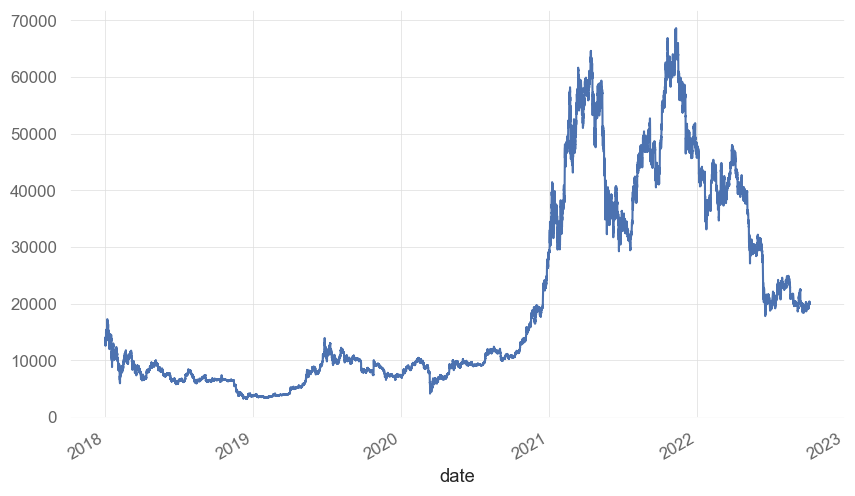

In [8]:
df1.close.plot()

## 3) BackTesting

### Settings

In [14]:
provider = 'kucoin'
inicial_cash = 50000 # initial capital for the portfolio
start_date = dt.datetime(2018,1,1) # Start date for backtesting


strategy1 = {'id': 1, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'BTC-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}

strategy2 = {'id': 2, # unique id for strategy to run
             'strategy': 'Simple_Avg_Cross', # strategy name, create in smartbots/crypto/strategies
             'params': {'ticker': 'ETH-USDT',
             'short_period': 10,
             'long_period': 500,
             'quantity': 1,
             'limit_save_values':1000,'point_value':1,'slippage':0}}



conf_portfolio = {'Name': 'PortfolioCrypto1',
                  'Data_Sources': 
                  [{'tickers': ['BTC-USDT','ETH-USDT'],
                   'event_type': 'bar',
                   'historical_source': 'mongoDB',
                   'historical_library': f'{provider}_historical_{interval}'}],
                   'Strategies': 
                    [strategy1, strategy2]}

In [15]:
portfolio = Portfolio_Constructor(conf_portfolio, run_real=False, asset_type='crypto',
                                             send_orders_to_broker=False, start_date=start_date,
                                  inicial_cash=inicial_cash)
portfolio.run_simulation() # backtest 

info_port = portfolio.get_saved_values_strategy() # read change of positions

Loading BTC-USDT from 2018-01-01 00:00:00
Loading ETH-USDT from 2018-01-01 00:00:00
Loading BTC-USDT from 2018-02-01 00:00:00
Loading ETH-USDT from 2018-02-01 00:00:00
Loading BTC-USDT from 2018-03-01 00:00:00
Loading ETH-USDT from 2018-03-01 00:00:00
Loading BTC-USDT from 2018-04-01 00:00:00
Loading ETH-USDT from 2018-04-01 00:00:00
Loading BTC-USDT from 2018-05-01 00:00:00
Loading ETH-USDT from 2018-05-01 00:00:00
Loading BTC-USDT from 2018-06-01 00:00:00
Loading ETH-USDT from 2018-06-01 00:00:00
Loading BTC-USDT from 2018-07-01 00:00:00
Loading ETH-USDT from 2018-07-01 00:00:00
Loading BTC-USDT from 2018-08-01 00:00:00
Loading ETH-USDT from 2018-08-01 00:00:00
Loading BTC-USDT from 2018-09-01 00:00:00
Loading ETH-USDT from 2018-09-01 00:00:00
Loading BTC-USDT from 2018-10-01 00:00:00
Loading ETH-USDT from 2018-10-01 00:00:00
Loading BTC-USDT from 2018-11-01 00:00:00
Loading ETH-USDT from 2018-11-01 00:00:00
Loading BTC-USDT from 2018-12-01 00:00:00
Loading ETH-USDT from 2018-12-01 0

## Statistics

Plots and statistics of the Strategies and the Portfolio.

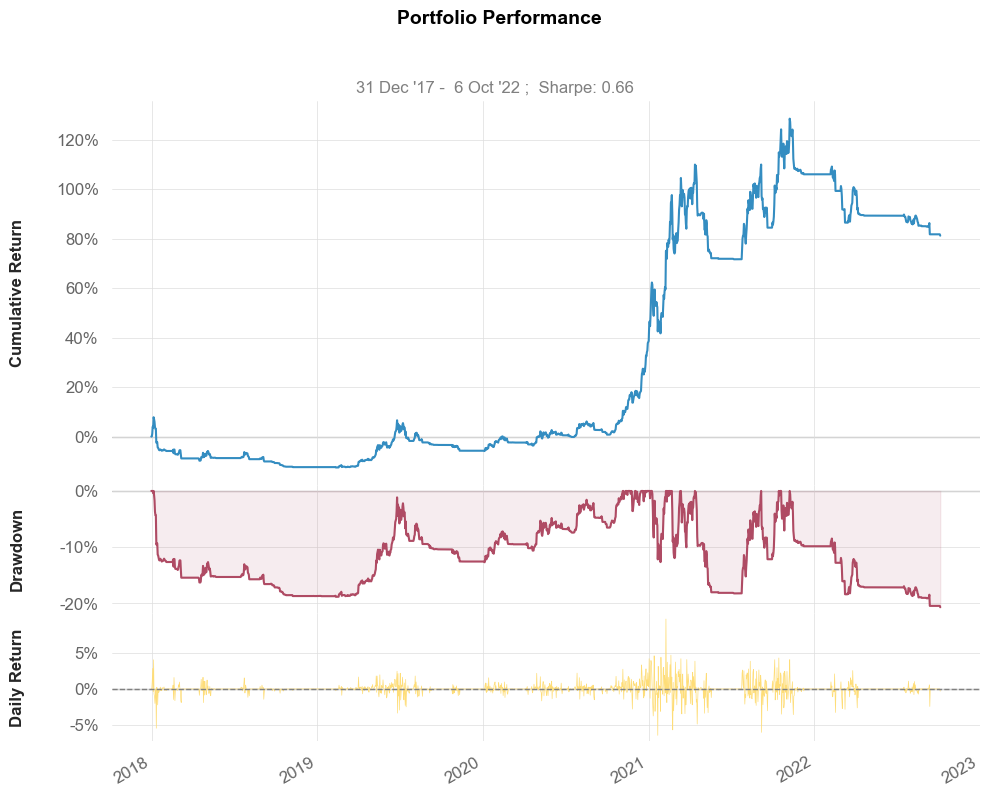

In [16]:
equities =portfolio.equity_handler.get_equities()
portfolio = equities['equity_portfolio']['equity']
port_return = portfolio.pct_change()
qs.plots.snapshot(portfolio, title='Portfolio Performance')

In [17]:
qs.reports.metrics(port_return, "BTC",mode= 'basic')

                    Strategy    Benchmark (BTC)
------------------  ----------  -----------------
Start Period        2018-01-01  2018-01-01
End Period          2022-10-06  2022-10-06
Risk-Free Rate      0.0%        0.0%
Time in Market      61.0%       27.0%

Cumulative Return   81.18%      -10.06%
CAGR﹪              13.29%      -2.2%

Sharpe              0.66        -0.92
Prob. Sharpe Ratio  96.04%      0.64%
Sortino             1.01        -1.17
Sortino/√2          0.71        -0.83
Omega               1.2         1.2

Max Drawdown        -20.69%     -10.47%
Longest DD Days     1034        643

Gain/Pain Ratio     0.2         -0.28
Gain/Pain (1M)      0.95        -0.68

Payoff Ratio        1.14        0.59
Profit Factor       1.2         0.72
Common Sense Ratio  1.57        0.51
CPC Index           0.71        0.2
Tail Ratio          1.31        0.71
Outlier Win Ratio   5.75        103.24
Outlier Loss Ratio  2.66        11.2

MTD                 -0.3%       0.3%
3M                  -